In [242]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sklearn

In [243]:
df = pd.read_csv('2018_public_use_data.csv')
print(df.shape)
df.dtypes

(6436, 1181)


PUBID      int64
REGION     int64
CENDIV     int64
PBA        int64
SQFT       int64
           ...  
ZTINT      int64
ZREFL      int64
ZAWN       int64
ZSKYLT     int64
ZDAYLTP    int64
Length: 1181, dtype: object

In [244]:
df.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,ZLTEXPC,ZPKLT,ZPKLTINOUT,ZPKLTN,ZWINTYP,ZTINT,ZREFL,ZAWN,ZSKYLT,ZDAYLTP
4465,4466,4,8,2,120000,7,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0
4719,4720,3,5,16,1700000,10,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
611,612,3,7,23,30000,5,1,8,2,1,...,1,1,1,1,0,0,0,0,0,1
2837,2838,3,6,12,2700,2,4,5,2,2,...,0,0,9,9,0,0,0,0,0,0
4045,4046,1,1,18,50001,6,1,1,1,1,...,0,0,9,9,0,0,0,0,0,0


In [245]:
df_codebook = pd.read_csv('2018cbecs_codebook_wDicts.csv')
df_codebook.head()

,category,file_order,col_name,col_type,length,col_description,codes,codes_dict
0,0,1,PUBID,Char,5,Public use file building identifier,00001 - 06436,{'00001 - 06436': 'continuous numerical range'}
1,0,2,REGION,Char,1,Census Region,1=Northeast\n2=Midwest\n3=South\n4=West,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3,CENDIV,Char,1,Census division,1=New England\n2=Middle Atlantic \n3=East Nor...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4,PBA,Num,8,Principal building activity,1=Vacant\n2=Office\n4=Laboratory\n5=Nonrefrige...,"{'1': 'Vacant', '2': 'Office', '4': 'Laborator..."
4,1,5,SQFT,Num,8,Square footage,"1,001 - 2,100,000","{'1,001 - 2,100,000': 'continuous numerical ra..."


In [246]:
print(df_codebook.category.unique())

[0 1 2 3 4 5 6 7]


In [247]:
df_codebook_2012 = pd.read_csv('2012cbecs_codebook_wDicts.csv')
df_codebook_2012.head()

,category,file_order,col_name,col_type,length,format,col_description,codes,codes_dict
0,0,1.0,PUBID,Char,5.0,NaN,Building identifier,00001 - 06720,{'00001 - 06720': 'continuous numerical range'}
1,0,2.0,REGION,Char,1.0,$REGION.,Census region,'1' = 'Northeast'\r\n'2' = 'Midwest'\r\n'3' = ...,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3.0,CENDIV,Char,1.0,$CENDIV.,Census division,'1' = 'New England'\r\n'2' = 'Middle Atlantic'...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4.0,PBA,Char,2.0,$PBA.,Principal building activity,'01' = 'Vacant'\r\n'02' = 'Office'\r\n'04' = '...,"{'01': 'Vacant', '02': 'Office', '04': 'Labora..."
4,1,5.0,FREESTN,Char,1.0,$YES.,Freestanding building,1' = 'Yes'\r\nMissing='No',"{'1': 'Yes', 'Missing': 'No'}"


In [248]:
col_name_2012 = df_codebook_2012.col_name.values.tolist()
col_name_2018 = df_codebook.col_name.values.tolist()

In [249]:
keep_var = df_codebook[df_codebook['col_name'].isin(col_name_2012)]
keep_var.shape

## 330 overlapping variables 

(330, 8)

In [250]:
keep_var_list = keep_var.col_name.values.tolist()

In [251]:
## Read 2012 Data

df_2012 = pd.read_csv('2012cbecs_train-data.csv')
df_2012_cons = pd.read_csv('2012cbecs_consumption-data.csv')

In [252]:
df_2012.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT
6502,6503,1,2,23,60000,1,0.0,15,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,3,1.0,0.0,1.0,0.0
1545,1546,2,4,23,126000,1,0.0,20,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,3,1.0,1.0,1.0,0.0
4916,4917,2,4,2,99000,4,1.0,10,2.0,0.0,...,0.0,0.0,0.0,3.0,1.0,2,1.0,0.0,1.0,1.0
5909,5910,3,5,12,18500,1,0.0,10,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,3,0.0,0.0,0.0,0.0
4282,4283,1,2,2,380000,3,1.0,15,3.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2,1.0,0.0,0.0,0.0


In [253]:
df_2012 = df_2012[df_2012.columns.intersection(keep_var_list)]
df_2012.shape

(6720, 330)

In [254]:
df_2012_cons.sample(5)

,HDD65,CDD65,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,...,MFUSED,DHUSED,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM
1947,2256,1586,154989.0,29339.0,32310.0,849.0,162539.0,0.0,0.0,8180.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5399,3730,2381,862251.0,0.0,1248.0,0.0,13570.0,0.0,96.0,140.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4581,3290,1424,104653.0,109436.0,243457.0,3247.0,275233.0,0.0,42213.0,9841.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6623,4274,891,221986.0,4638.0,4347.0,7922.0,4485.0,0.0,0.0,5074.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5258,8327,224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


EDA Consumption 

In [255]:
# col_list = ['MFHTBTU',
# 'MFCLBTU',
# 'MFVNBTU',
# 'MFWTBTU',
# 'MFLTBTU',
# 'MFCKBTU',
# 'MFRFBTU',
# 'MFOFBTU',
# 'MFPCBTU',
# 'MFOTBTU',
# 'ELHTBTU',
# 'ELCLBTU',
# 'ELVNBTU',
# 'ELWTBTU',
# 'ELLTBTU',
# 'ELCKBTU',
# 'ELRFBTU',
# 'ELOFBTU',
# 'ELPCBTU',
# 'ELOTBTU',
# 'NGHTBTU',
# 'NGCLBTU',
# 'NGWTBTU',
# 'NGCKBTU',
# 'NGOTBTU',
# 'FKHTBTU',
# 'FKCLBTU',
# 'FKWTBTU',
# 'FKCKBTU',
# 'FKOTBTU',
# 'DHHTBTU',
# 'DHCLBTU',
# 'DHWTBTU',
# 'DHCKBTU',
# 'DHOTBTU']
# df_2012_cons['total_consumption'] = df_2012_cons[col_list].sum(axis=1)
# df_2012_cons['energy_intensity'] = df_2012_cons['total_consumption']/df_2012['SQFT']

In [256]:
# df_2012_cons[['energy_intensity']]

In [257]:
# df_2012_cons['energy_intensity'].describe()

In [258]:
# df_2012_cons[df_2012_cons['energy_intensity']==0].sample(5)

In [259]:
# df_2012_total = df_2012.join(df_2012_cons)
# df_2012_total.sample(5)

In [260]:
# df_renov = df_2012_total[df_2012_total['RENOV']==1]
# df_renov.sample(5)

In [261]:
# df_renov['energy_intensity'].describe()

In [262]:
## look at specific renovations? in theory should be lower

In [263]:
category_map = {}
for cat in df_codebook.category.unique():
    category_cols_df = df_codebook[df_codebook['category'] == cat]
    cat_cols = []
    for col in category_cols_df.col_name.values:
        if type(col) == str:
            cat_cols.append(col)
    category_map[cat] = cat_cols

In [264]:
keep_cols = []
for wanted_cols in category_map.values():
    for col in wanted_cols:
        keep_cols.append(col)
print(len(keep_cols))

561


## EDA

Separated by Category (1-7, 10)

In [265]:
def find_num_cat_cols(list_of_dfs, category_num, list_of_numcols, list_of_catcols):
    numeric_cols = []
    categorical_cols = []
    for col in list_of_dfs[category_num].columns:
        if col in list_of_numcols:
            numeric_cols.append(col)
        elif col in list_of_catcols:
            categorical_cols.append(col)
    df_category = list_of_dfs[category_num].copy()[numeric_cols + categorical_cols]
    return df_category, numeric_cols, categorical_cols

In [266]:
def create_new_codebook(codebook, cols):
    new_codebook = dict(codebook.set_index('col_name').loc[cols].codes_dict)
    return new_codebook

In [267]:
def create_replace_map(new_codebook, category_df, return_errors=False):
    replace_map = {}
    error_map = {}
    for col_name, codebook in new_codebook.items():
        try:
            codebook = json.loads(codebook.replace("'", '"'))
        except ValueError as e:
            print(f'JSONDecodeError on column {col_name}')
            error_map[col_name] = (col_name, e)
            codebook = codebook.replace('"', '')
            codebook = json.loads(codebook.replace("'", '"'))
        finally:
            if col_name in category_df.columns:
                for code, code_val in codebook.items():
                    if code == '2' and code_val == 'No':
                        replace_map[col_name] = 2
    
    if return_errors == True:
        return replace_map, error_map
    else:
        return replace_map

In [268]:
def build_hist(column_list):
    figname = 0
    for column in column_list:
        plt.figure(figname)
        sns.set(rc = {'figure.figsize':(2,2)})
        sns.histplot(data=df, x=column, kde=True)
        figname += 1

In [269]:
df = df[keep_cols]
print(df.shape)
df.sample(5)

(6436, 561)


,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,LTEXPC,PKLT,PKLTINOUT,PKLTN,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
3587,3588,4,8,6,3000,2,1,4,2,3,...,1,2,.,5,2,1,2,1,2,0
2895,2896,4,8,14,320000,8,1,6,2,1,...,2,2,.,5,2,1,1,2,2,25
1829,1830,3,5,14,320000,8,1,1,1,1,...,1,1,2,80,3,1,2,1,2,5
3814,3815,2,3,13,80000,6,1,5,1,2,...,1,1,2,180,2,1,2,1,1,10
5601,5602,2,3,13,53000,6,1,1,1,1,...,1,2,.,5,3,2,2,2,2,0


In [270]:
## Adjusting for weird values

df.NFLOOR.replace(to_replace=994, value=10, inplace=True)
df.NFLOOR.replace(to_replace=995, value=15, inplace=True)
df.BASEMNT.replace(to_replace=995, value=5, inplace=True)
df.FLCEILHT.replace(to_replace=995, value=51, inplace=True)
df.NELVTR.replace(to_replace=995, value=31, inplace=True)
df.NESLTR.replace(to_replace=995, value=11, inplace=True)
df.RWSEAT.replace(to_replace=99995, value=2001, inplace=True)
df.PBSEAT.replace(to_replace=999995, value=15001, inplace=True)
df.HCBED.replace(to_replace=9995, value=251, inplace=True)
df.NRSBED.replace(to_replace=9995, value=251, inplace=True)
df.LODGRM.replace(to_replace=99995, value=1001, inplace=True)
df.NOCC.replace(to_replace=996, value=0, inplace=True) 
df.NOCCAT.replace (to_replace=996, value=0, inplace=True) 
df.XRAYN.replace(to_replace=995, value=21, inplace=True)
df.LGOFFDEVN.replace(to_replace=9995, value=501, inplace=True) # new var
df.SMOFFDEVN.replace(to_replace=9995, value=501, inplace=True) # new var
df.WBOARDSN.replace(to_replace=9995, value=201, inplace=True) # new var
df.TVVIDEON.replace(to_replace=995, value=201, inplace=True) 
df.RFGCOMPN.replace(to_replace=9995, value=1001, inplace=True)
df.RFGRSN.replace(to_replace=99995, value=1001, inplace=True)
df.SERVERN.replace(to_replace=9995, value=501, inplace=True)


## Not the same as 2012
# df.YRCON.replace(to_replace=995, value=1945, inplace=True) -- diff formulation
# df.ELLUPCT.replace(to_replace=999, value=None, inplace=True) -- var not exist in 2018
# df.WOEXP.replace(to_replace=999999, value=None, inplace=True) -- diff formulation

In [271]:
category_dfs = {}
for cat_name, cat_list in category_map.items():
    category_dfs[cat_name] = df[cat_list]
category_dfs[0].sample(10)

,PUBID,REGION,CENDIV,PBA
4312,4313,2,4,2
4970,4971,1,2,2
1942,1943,4,8,2
4813,4814,3,5,2
2632,2633,2,4,13
2546,2547,4,9,17
3967,3968,3,5,2
4333,4334,4,8,5
2244,2245,4,8,2
3785,3786,4,8,26


In [272]:
codebook_check = df_codebook.copy().set_index('col_name')
num_cols = []
cat_cols = []
for col in codebook_check.index:
    if codebook_check.loc[col].col_type == 'Num':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print(len(num_cols))
print(len(cat_cols))

558
3


In [273]:
df = df[df.columns.intersection(keep_var_list)]
df.shape

(6436, 330)

In [274]:
df.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
6091,6092,1,2,25,15000,4,3,6,2,2,...,2,2,4,1,1,1,2,2,2,20
1487,1488,2,3,5,800000,9,2,5,1,2,...,2,2,2,1,2,2,1,2,1,20
860,861,2,3,2,245000,8,8,6,2,1,...,2,2,3,1,2,1,1,1,2,65
5560,5561,1,2,13,1500000,10,1,6,1,2,...,2,2,3,1,2,1,2,2,2,20
2500,2501,3,5,2,300000,8,6,4,1,1,...,2,2,3,1,2,2,2,2,2,25


Missing Values

In [275]:
df_codebook = create_new_codebook(df_codebook, list(df.columns))
replace_map, error_map = create_replace_map(df_codebook, df, return_errors=True)
print(error_map)

JSONDecodeError on column BLDSHP
JSONDecodeError on column WTHTEQ
{'BLDSHP': ('BLDSHP', JSONDecodeError("Expecting ',' delimiter: line 1 column 127 (char 126)")), 'WTHTEQ': ('WTHTEQ', JSONDecodeError("Expecting ',' delimiter: line 1 column 43 (char 42)"))}


In [276]:
df_filled = df.replace(to_replace=replace_map, value=0).fillna(value=0)
df_filled = df_filled.replace(to_replace='.', value=0)
df_filled[0:20]

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
0,1,3,5,2,210000,8,1,4,0,1,...,2,2,2,1,2,2,2,2,1,0
1,2,4,9,2,28000,5,1,6,1,1,...,2,2,1,1,1,1,1,2,1,15
2,3,3,5,8,2100,2,1,4,0,3,...,2,2,4,1,2,2,2,1,2,40
3,4,3,7,5,240000,8,2,6,1,1,...,2,2,2,1,2,1,2,2,2,5
4,5,1,2,5,295000,8,3,6,0,1,...,2,2,4,1,2,1,2,2,1,0
5,6,3,5,14,94000,6,1,6,1,1,...,2,2,4,1,2,2,2,2,2,20
6,7,4,8,14,41000,5,1,4,1,1,...,2,2,1,1,2,1,2,2,2,75
7,8,2,3,5,122000,7,1,6,1,1,...,1,2,4,1,3,2,2,1,2,0
8,9,4,8,25,96000,6,3,6,1,1,...,2,2,3,1,1,1,2,2,2,40
9,10,1,2,14,220000,8,1,1,0,1,...,2,2,4,1,2,1,2,1,2,10


# PCA

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

lr = LinearRegression()
scaler_train = StandardScaler()
pca_train = PCA()

X_train = df_2012.to_numpy(dtype=float, copy=True)
X_train_scaled = scaler_train.fit_transform(X_train)
X_train_pca = pca_train.fit_transform(X_train_scaled)

In [278]:
pca_exp_var = pd.DataFrame(pca_train.explained_variance_ratio_,)
pca_exp_var.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.107165,0.033453,0.023745,0.020782,0.020388,0.01831,0.016443,0.015666,0.015183,0.013235,...,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,2.466195e-34


In [320]:
# plt.figure(figsize=(5,5))
# plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
# plt.xlabel('num components')
# plt.ylabel('cumulative explained variance')

<AxesSubplot:xlabel='0', ylabel='1'>

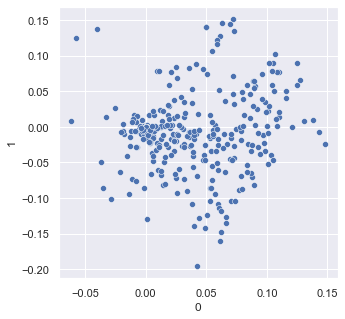

In [280]:
pca_train_df = pd.DataFrame(pca_train.components_)
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x=pca_train_df.T[0], y=pca_train_df.T[1])

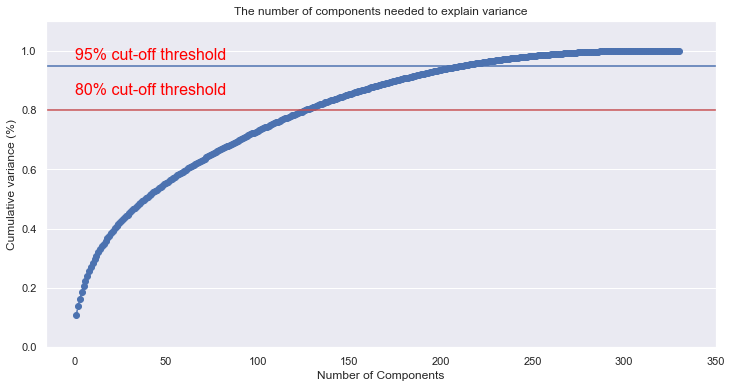

In [313]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 331, step=1)
y = np.cumsum(pca_train.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 400, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.97, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

# https://www.kaggle.com/code/kushal1506/deciding-n-components-in-pca/notebook

In [312]:
# We center the data and compute the sample covariance matrix.

# n_samples = X_train_scaled.shape[0]
# X_centered = X_train_scaled - np.mean(X_train_scaled, axis=0)
# cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
# eigenvalues = pca_train.explained_variance_
# for eigenvalue, eigenvector in zip(eigenvalues, pca_train.components_):    
#     print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
#     print(eigenvalue)
    
# https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca    

In [318]:
# https://compneuro.neuromatch.io/tutorials/W1D5_DimensionalityReduction/student/W1D5_Tutorial3.html

# def sort_evals_descending(evals, evectors):
#     index = np.flip(np.argsort(evals))
#     evals = evals[index]
#     evectors = evectors[:, index]
#     if evals.shape[0] == 2:
#         if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
#             evectors[:, 0] = -evectors[:, 0]
#     if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
#         evectors[:, 1] = -evectors[:, 1]
#     return evals, evectors

    # this is for eig_pairs 
    # https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#standardizing
#     # Make a list of (eigenvalue, eigenvector) tuples
#     eig_pairs = [(np.abs(evals[i]), evectors[:,i]) for i in range(len(evals))]

#     # Sort the (eigenvalue, eigenvector) tuples from high to low
#     eig_pairs.sort(key=lambda x: x[0], reverse=True)

def get_data(cov_matrix):
    cov = corr_coef * np.sqrt(var_1 * var_2)
    cov_matrix = np.array([[var_1, cov], [cov, var_2]])
    return cov_matrix

def change_of_basis(X, W):
    Y = np.matmul(X, W)
    return Y


def plot_eigenvalues(evals):

    plt.figure(figsize=(4, 4))
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    plt.xticks(np.arange(1, len(evals) + 1))
    plt.ylim([0, 5])


In [315]:
def pca(X):
    
    # Calculate the sample covariance matrix
    cov_matrix = get_sample_cov_matrix(X)
    
    # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(cov_matrix)
    
#     # Sort the eigenvalues in descending order
#     evals, evectors = sort_evals_descending(evals, evectors)
    
    # Project the data onto the new eigenvector basis
    score = change_of_basis(X, evectors)

    return score, evectors, evals



In [319]:
# Perform PCA
score, evectors, evals = pca(X_train_scaled)

# Plot the eigenvalues  - SCREE plot going other way??
# with plt.xkcd():
#     plot_eigenvalues(evals)
#     plt.xlim([0, 350])  

In [330]:
pca_final = PCA(n_components=200)
X_train = df_2012.to_numpy(dtype=float, copy=True)
X_train_scaled = scaler_train.fit_transform(X_train)
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [331]:
X_train_pca.shape

(6720, 200)

In [332]:
# pca_exp_var = pd.DataFrame(pca_final.explained_variance_ratio_,)
# pca_exp_var.T

In [333]:
X_train_pca.shape

(6720, 200)

In [334]:
X_projected = pca_final.inverse_transform(X_train_pca)
X_projected2 = X_train_pca.dot(pca_final.components_) + pca_final.mean_
# assert_array_almost_equal(X_projected, X_projected2)
loss = np.sum((X_train_scaled - X_projected) ** 2, axis=1).mean()
loss #projection loss

# 125 components: loss is ~65

20.72019363587825

In [335]:
X_projected.shape

(6720, 330)

In [336]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error

# lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()

# cv = KFold(n_splits=10, shuffle=True, random_state=42)

# # Initialize linear regression instance
# lin_reg = LinearRegression()

# # Create empty list to store RMSE for each iteration
# rmse_list = []

# # Loop through different count of principal components for linear regression
# for i in range(1, X_train_pca.shape[1]+1):
#     rmse_score = -1 * cross_val_score(lin_reg, 
#                                       X_train_pca[:,:i], # Use first k principal components
#                                       y_train, 
#                                       cv=cv, 
#                                       scoring='neg_root_mean_squared_error').mean()
#     rmse_list.append(rmse_score)
    
# # Visual analysis - plot RMSE vs count of principal components used
# plt.plot(rmse_list, '-o')
# plt.xlabel('Number of principal components in regression')
# plt.ylabel('RMSE')
# plt.title('Quality')
# plt.xlim(xmin=-1);
# plt.xticks(np.arange(X_train_pca.shape[1]), np.arange(1, X_train_pca.shape[1]+1))
# plt.axhline(y=lr_score_train, color='g', linestyle='-');

# https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f

In [337]:
# import numpy as np
# import sklearn.datasets, sklearn.decomposition

# X = sklearn.datasets.load_iris().data
# mu = np.mean(X, axis=0)

# pca = sklearn.decomposition.PCA()
# pca.fit(X)

# nComp = 2
# Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
# Xhat += mu

# print(Xhat[0,])

## https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

In [349]:
X_train_pca.shape

(6720, 200)

In [350]:
X_train_pca

array([[-4.5721202 ,  0.65665733, -0.06845835, ..., -0.53004305,
        -0.34882118, -0.75501167],
       [ 2.46351398, -5.95499507,  1.83706693, ..., -0.33428264,
         0.05742092,  0.44892531],
       [-6.07700067,  4.23186348, -2.00199149, ...,  1.12113301,
         1.54548543, -0.04467541],
       ...,
       [-5.21814933,  2.00312996, -0.48461784, ..., -0.15891514,
        -0.231316  , -0.45553259],
       [-3.21904935, -1.49868319,  0.03457658, ...,  0.01474513,
        -0.1415889 , -0.36304328],
       [ 8.88581499, -2.89711592, -3.42299596, ..., -0.38526266,
         0.16412324, -0.86895001]])

In [338]:
## PCA on 2018 data

X_test = df_filled.to_numpy(dtype=float, copy=True)
X_test_scaled = scaler_train.transform(X_test)
X_test_pca = pca_final.transform(X_test_scaled)

In [339]:
X_test_pca.shape

(6436, 200)

In [415]:
col_list = ['MFHTBTU',
'MFCLBTU',
'MFVNBTU',
'MFWTBTU',
'MFLTBTU',
'MFCKBTU',
'MFRFBTU',
'MFOFBTU',
'MFPCBTU',
'MFOTBTU',
'ELHTBTU',
'ELCLBTU',
'ELVNBTU',
'ELWTBTU',
'ELLTBTU',
'ELCKBTU',
'ELRFBTU',
'ELOFBTU',
'ELPCBTU',
'ELOTBTU',
'NGHTBTU',
'NGCLBTU',
'NGWTBTU',
'NGCKBTU',
'NGOTBTU',
'FKHTBTU',
'FKCLBTU',
'FKWTBTU',
'FKCKBTU',
'FKOTBTU',
'DHHTBTU',
'DHCLBTU',
'DHWTBTU',
'DHCKBTU',
'DHOTBTU']
y_train = pd.DataFrame(df_2012_cons[col_list].sum(axis=1))
y_train.sample(50)

## DROP THE 0S FROM TRAINING DATASET

,0
3463,13863014.0
4001,5386660.0
238,0.0
3075,997996.0
4272,5207994.0
1508,4221006.0
2869,364204.0
6641,2114778.0
1311,25055744.0
2565,3183604.0


In [392]:
if item in y_train != 0:
    y_train_final = np.log(y_train)
y_train_final.sample(50)

,0
3647,14.007499
5414,12.900459
6211,14.137809
2736,16.632594
4919,15.404458
6465,15.744575
481,14.737047
4894,12.674644
1093,14.146741
6153,16.168653


NameError: name 'inf' is not defined

In [380]:
lr.fit(X_train_pca, y_train_final)
y_pred = lr.predict(X_test_pca)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [342]:
y_pred.shape

(6436, 1)

In [379]:
y_pred

# mean median is roughly equal in predictions
# consider log transform

array([[-3.45940252e+09],
       [ 3.66981987e+08],
       [ 1.06465333e+09],
       ...,
       [-6.50196494e+09],
       [ 6.00788771e+08],
       [-2.68088519e+10]])

In [345]:
y_projected = pca_final.inverse_transform(y_pred)
# y_projected2 = y_pred.dot(pca_final.components_) + pca_final.mean_

ValueError: shapes (6436,1) and (200,330) not aligned: 1 (dim 1) != 200 (dim 0)

In [49]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from numpy import mean
# from numpy import absolute
# from numpy import sqrt

In [57]:
# X_train_pca2 = X_train_pca.copy()
# y_train_scaled2 = y_train_scaled.copy()
# X_test_pca2 = X_test_pca.copy()

In [58]:
# cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [59]:
# scores = cross_val_score(lr, X_train_pca2, y_train_scaled2, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

In [60]:
# sqrt(mean(absolute(scores)))

In [271]:
# y_train_scaled = scaler_train.transform(y_train)
# y_train_pca = pca_train.fit_transform(y_train_scaled)

In [61]:
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In [62]:
# print("Cross-validation scores:\n{}".format(cross_val_score(lr, X_train_pca2, y_train_scaled2, cv=kfold)))